In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import urllib.request as ur
import json
import datetime
%matplotlib inline

In [2]:
# cases data per location
df_cases = pd.read_csv('zika_clusters.csv', low_memory=False)
df_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 3 columns):
location          1605 non-null object
date              1605 non-null object
zika_confirmed    1605 non-null int64
dtypes: int64(1), object(2)
memory usage: 37.7+ KB


In [3]:
# population data
df_population = pd.read_csv('population_density.csv', low_memory=False)

In [4]:
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1714 entries, 0 to 1713
Data columns (total 2 columns):
location          1714 non-null object
density_per_km    1714 non-null float64
dtypes: float64(1), object(1)
memory usage: 26.9+ KB


In [5]:
df = pd.merge(df_cases, df_population, on='location', how='left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1610 entries, 0 to 1609
Data columns (total 4 columns):
location          1610 non-null object
date              1610 non-null object
zika_confirmed    1610 non-null int64
density_per_km    1548 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 62.9+ KB


In [9]:
# latutude and longitude data
df_lat_long = pd.read_csv('latitude_longitude.csv', low_memory=False)
df_lat_long.head()

,location,location_type,country,province,county,city,latitude,longitude
0,Argentina-Buenos_Aires,province,Argentina,Buenos Aires,NaN,NaN,-34.603684,-58.381559
1,Argentina-CABA,province,Argentina,Ciudad de Buenos Aires,NaN,NaN,-34.603684,-58.381559
2,Argentina-Cordoba,province,Argentina,Cordoba,NaN,NaN,-31.420083,-64.188776
3,Argentina-Entre_Rios,province,Argentina,Entre Rios,NaN,NaN,-31.774665,-60.495646
4,Argentina-Santa_Fe,province,Argentina,Santa Fe,NaN,NaN,-31.610658,-60.697294


In [10]:
# merge latitude and longitude data
df = pd.merge(df, df_lat_long, on='location', how='left')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 0 to 1619
Data columns (total 11 columns):
location          1620 non-null object
date              1620 non-null object
zika_confirmed    1620 non-null int64
density_per_km    1558 non-null float64
location_type     1558 non-null object
country           1558 non-null object
province          1510 non-null object
county            1287 non-null object
city              1326 non-null object
latitude          1558 non-null float64
longitude         1558 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 151.9+ KB


In [13]:
# gdp data
df_gdp = pd.read_csv('gdp_info.csv', low_memory=False)
df_gdp

,country,2015,2016,2017
0,Argentina,642.5,554.1,637.7
1,Brazil,1799.7,1793.1,2055.0
2,Colombia,291.5,280.0,309.2
3,Dominican Republic,68.2,71.7,75.0
4,Ecuador,99.3,98.6,102.3
5,El Salvador,26.1,26.8,28.0
6,Guatemala,63.8,68.8,75.7
7,Haiti,8.7,8.2,8.6
8,Mexico,1169.6,1076.9,1149.2
9,Nicaragua,12.7,13.2,13.7


In [14]:
# merge gdp 
df = pd.merge(df, df_gdp, on='country', how='left')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 0 to 1619
Data columns (total 14 columns):
location          1620 non-null object
date              1620 non-null object
zika_confirmed    1620 non-null int64
density_per_km    1558 non-null float64
location_type     1558 non-null object
country           1558 non-null object
province          1510 non-null object
county            1287 non-null object
city              1326 non-null object
latitude          1558 non-null float64
longitude         1558 non-null float64
2015              1558 non-null float64
2016              1558 non-null float64
2017              1558 non-null float64
dtypes: float64(6), int64(1), object(7)
memory usage: 189.8+ KB


In [15]:
# mosquito data
df_mosquito = pd.read_csv('mosquito_info.csv', low_memory=False)


In [16]:
df_mosquito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24019 entries, 0 to 24018
Data columns (total 12 columns):
vector           24019 non-null object
occurrence_id    24019 non-null int64
source_type      24019 non-null object
location_type    23769 non-null object
polygon_admin    23368 non-null object
latitude         24019 non-null float64
longitude        24019 non-null float64
year             24019 non-null int64
country          24019 non-null object
country_id       24019 non-null object
gaul_ad0         24019 non-null int64
status           183 non-null object
dtypes: float64(2), int64(3), object(7)
memory usage: 2.2+ MB


In [17]:
# Closest mosquito sighting
mosquito_coords = df_mosquito[['latitude', 'longitude']].values[np.newaxis, :]
places_coords = np.rollaxis(df[['latitude','latitude']].values[np.newaxis, :], 0, -1)
dist_coords = ((places_coords - mosquito_coords)**2).sum(axis=-1)
min_dist = dist_coords.min(axis=1)


In [18]:
# new column mosquito distance
df['mosquito_dist'] = min_dist
df.head()

,location,date,zika_confirmed,density_per_km,location_type,country,province,county,city,latitude,longitude,2015,2016,2017,mosquito_dist
0,Argentina-Buenos_Aires,2016-03-19,1,12625.800781,province,Argentina,Buenos Aires,NaN,NaN,-34.603684,-58.381559,642.5,554.1,637.7,193.070960
1,Argentina-CABA,2016-03-19,1,12625.800781,province,Argentina,Ciudad de Buenos Aires,NaN,NaN,-34.603684,-58.381559,642.5,554.1,637.7,193.070960
2,Argentina-Catamarca,2016-03-19,1,460.153595,province,Argentina,Catamarca,NaN,NaN,-28.469581,-65.779544,642.5,554.1,637.7,204.293453
3,Argentina-Chaco,2016-03-19,1,121.331650,province,Argentina,Chaco,NaN,NaN,-27.425717,-59.024378,642.5,554.1,637.7,215.267115
4,Argentina-Chubut,2016-03-19,1,37.095642,province,Argentina,Chubut,NaN,NaN,-43.293425,-65.111482,642.5,554.1,637.7,205.408153


In [19]:
df.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 0 to 1619
Data columns (total 15 columns):
location          1620 non-null object
date              1620 non-null object
zika_confirmed    1620 non-null int64
density_per_km    1558 non-null float64
location_type     1558 non-null object
country           1558 non-null object
province          1510 non-null object
county            1287 non-null object
city              1326 non-null object
latitude          1558 non-null float64
longitude         1558 non-null float64
2015              1558 non-null float64
2016              1558 non-null float64
2017              1558 non-null float64
mosquito_dist     1558 non-null float64
dtypes: float64(7), int64(1), object(7)
memory usage: 202.5+ KB


In [20]:
# weather data
df_weather = pd.read_csv('weekly_weather.csv', low_memory=False)

In [21]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112644 entries, 0 to 112643
Data columns (total 20 columns):
date              112644 non-null object
max_temp          112644 non-null float64
max_temp1         112644 non-null float64
max_temp2         112644 non-null float64
location          112644 non-null object
mean_temp         112644 non-null float64
mean_temp1        112644 non-null float64
mean_temp2        112644 non-null float64
min_temp          112644 non-null float64
min_temp1         112644 non-null float64
min_temp2         112644 non-null float64
dew_point         112644 non-null float64
dew_point1        112644 non-null float64
dew_point2        112644 non-null float64
precipitation     112644 non-null float64
precipitation1    112644 non-null float64
precipitation2    112644 non-null float64
wind              112644 non-null float64
wind1             112644 non-null float64
wind2             112644 non-null float64
dtypes: float64(18), object(2)
memory usage: 17.2+ 

In [31]:
df = pd.merge(df, df_weather, on=['location','date'], how='left')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1620 entries, 0 to 1619
Data columns (total 33 columns):
location          1620 non-null object
date              1620 non-null object
zika_confirmed    1620 non-null int64
density_per_km    1558 non-null float64
location_type     1558 non-null object
country           1558 non-null object
province          1510 non-null object
county            1287 non-null object
city              1326 non-null object
latitude          1558 non-null float64
longitude         1558 non-null float64
2015              1558 non-null float64
2016              1558 non-null float64
2017              1558 non-null float64
mosquito_dist     1558 non-null float64
max_temp          1620 non-null float64
max_temp1         1073 non-null float64
max_temp2         1073 non-null float64
mean_temp         1620 non-null float64
mean_temp1        1073 non-null float64
mean_temp2        1073 non-null float64
min_temp          1620 non-null float64
min_temp1         1073

In [33]:
# impute missing data 
df['max_temp'] = df['max_temp'].interpolate(method='linear', limit_direction='both')
df['mean_temp'] = df['mean_temp'].interpolate(method='linear', limit_direction='both')
df['min_temp'] = df['min_temp'].interpolate(method='linear', limit_direction='both')
df['dew_point'] = df['dew_point'].interpolate(method='linear', limit_direction='both')
df['precipitation'] = df['precipitation'].interpolate(method='linear', limit_direction='both')
df['wind'] = df['wind'].interpolate(method='linear', limit_direction='both')

In [37]:
df['gdp'] = df['2016'] 

In [48]:
df = df.drop(['wind1','wind2','precipitation1','precipitation2','dew_point1','dew_point2','min_temp1', 'min_temp2','max_temp1','max_temp2','2015','2016','2017'],axis=1)  

KeyError: "['wind1' 'wind2' 'precipitation1' 'precipitation2' 'dew_point1'\n 'dew_point2' 'min_temp1' 'min_temp2' 'max_temp1' 'max_temp2' '2015'\n '2016' '2017'] not found in axis"

In [49]:
df = df.drop(['country','province','county','city'],axis=1)  

KeyError: "['country' 'province' 'county' 'city'] not found in axis"

In [51]:
df = df.drop(['mean_temp1','mean_temp2'],axis=1) 

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1558 entries, 0 to 1619
Data columns (total 15 columns):
location          1558 non-null object
date              1558 non-null object
zika_confirmed    1558 non-null int64
density_per_km    1558 non-null float64
location_type     1558 non-null object
latitude          1558 non-null float64
longitude         1558 non-null float64
mosquito_dist     1558 non-null float64
max_temp          1558 non-null float64
mean_temp         1558 non-null float64
min_temp          1558 non-null float64
dew_point         1558 non-null float64
precipitation     1558 non-null float64
wind              1558 non-null float64
gdp               1558 non-null float64
dtypes: float64(11), int64(1), object(3)
memory usage: 194.8+ KB


In [53]:
df = df[df['latitude'].notnull()]

/Users/Gulya/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/Gulya/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


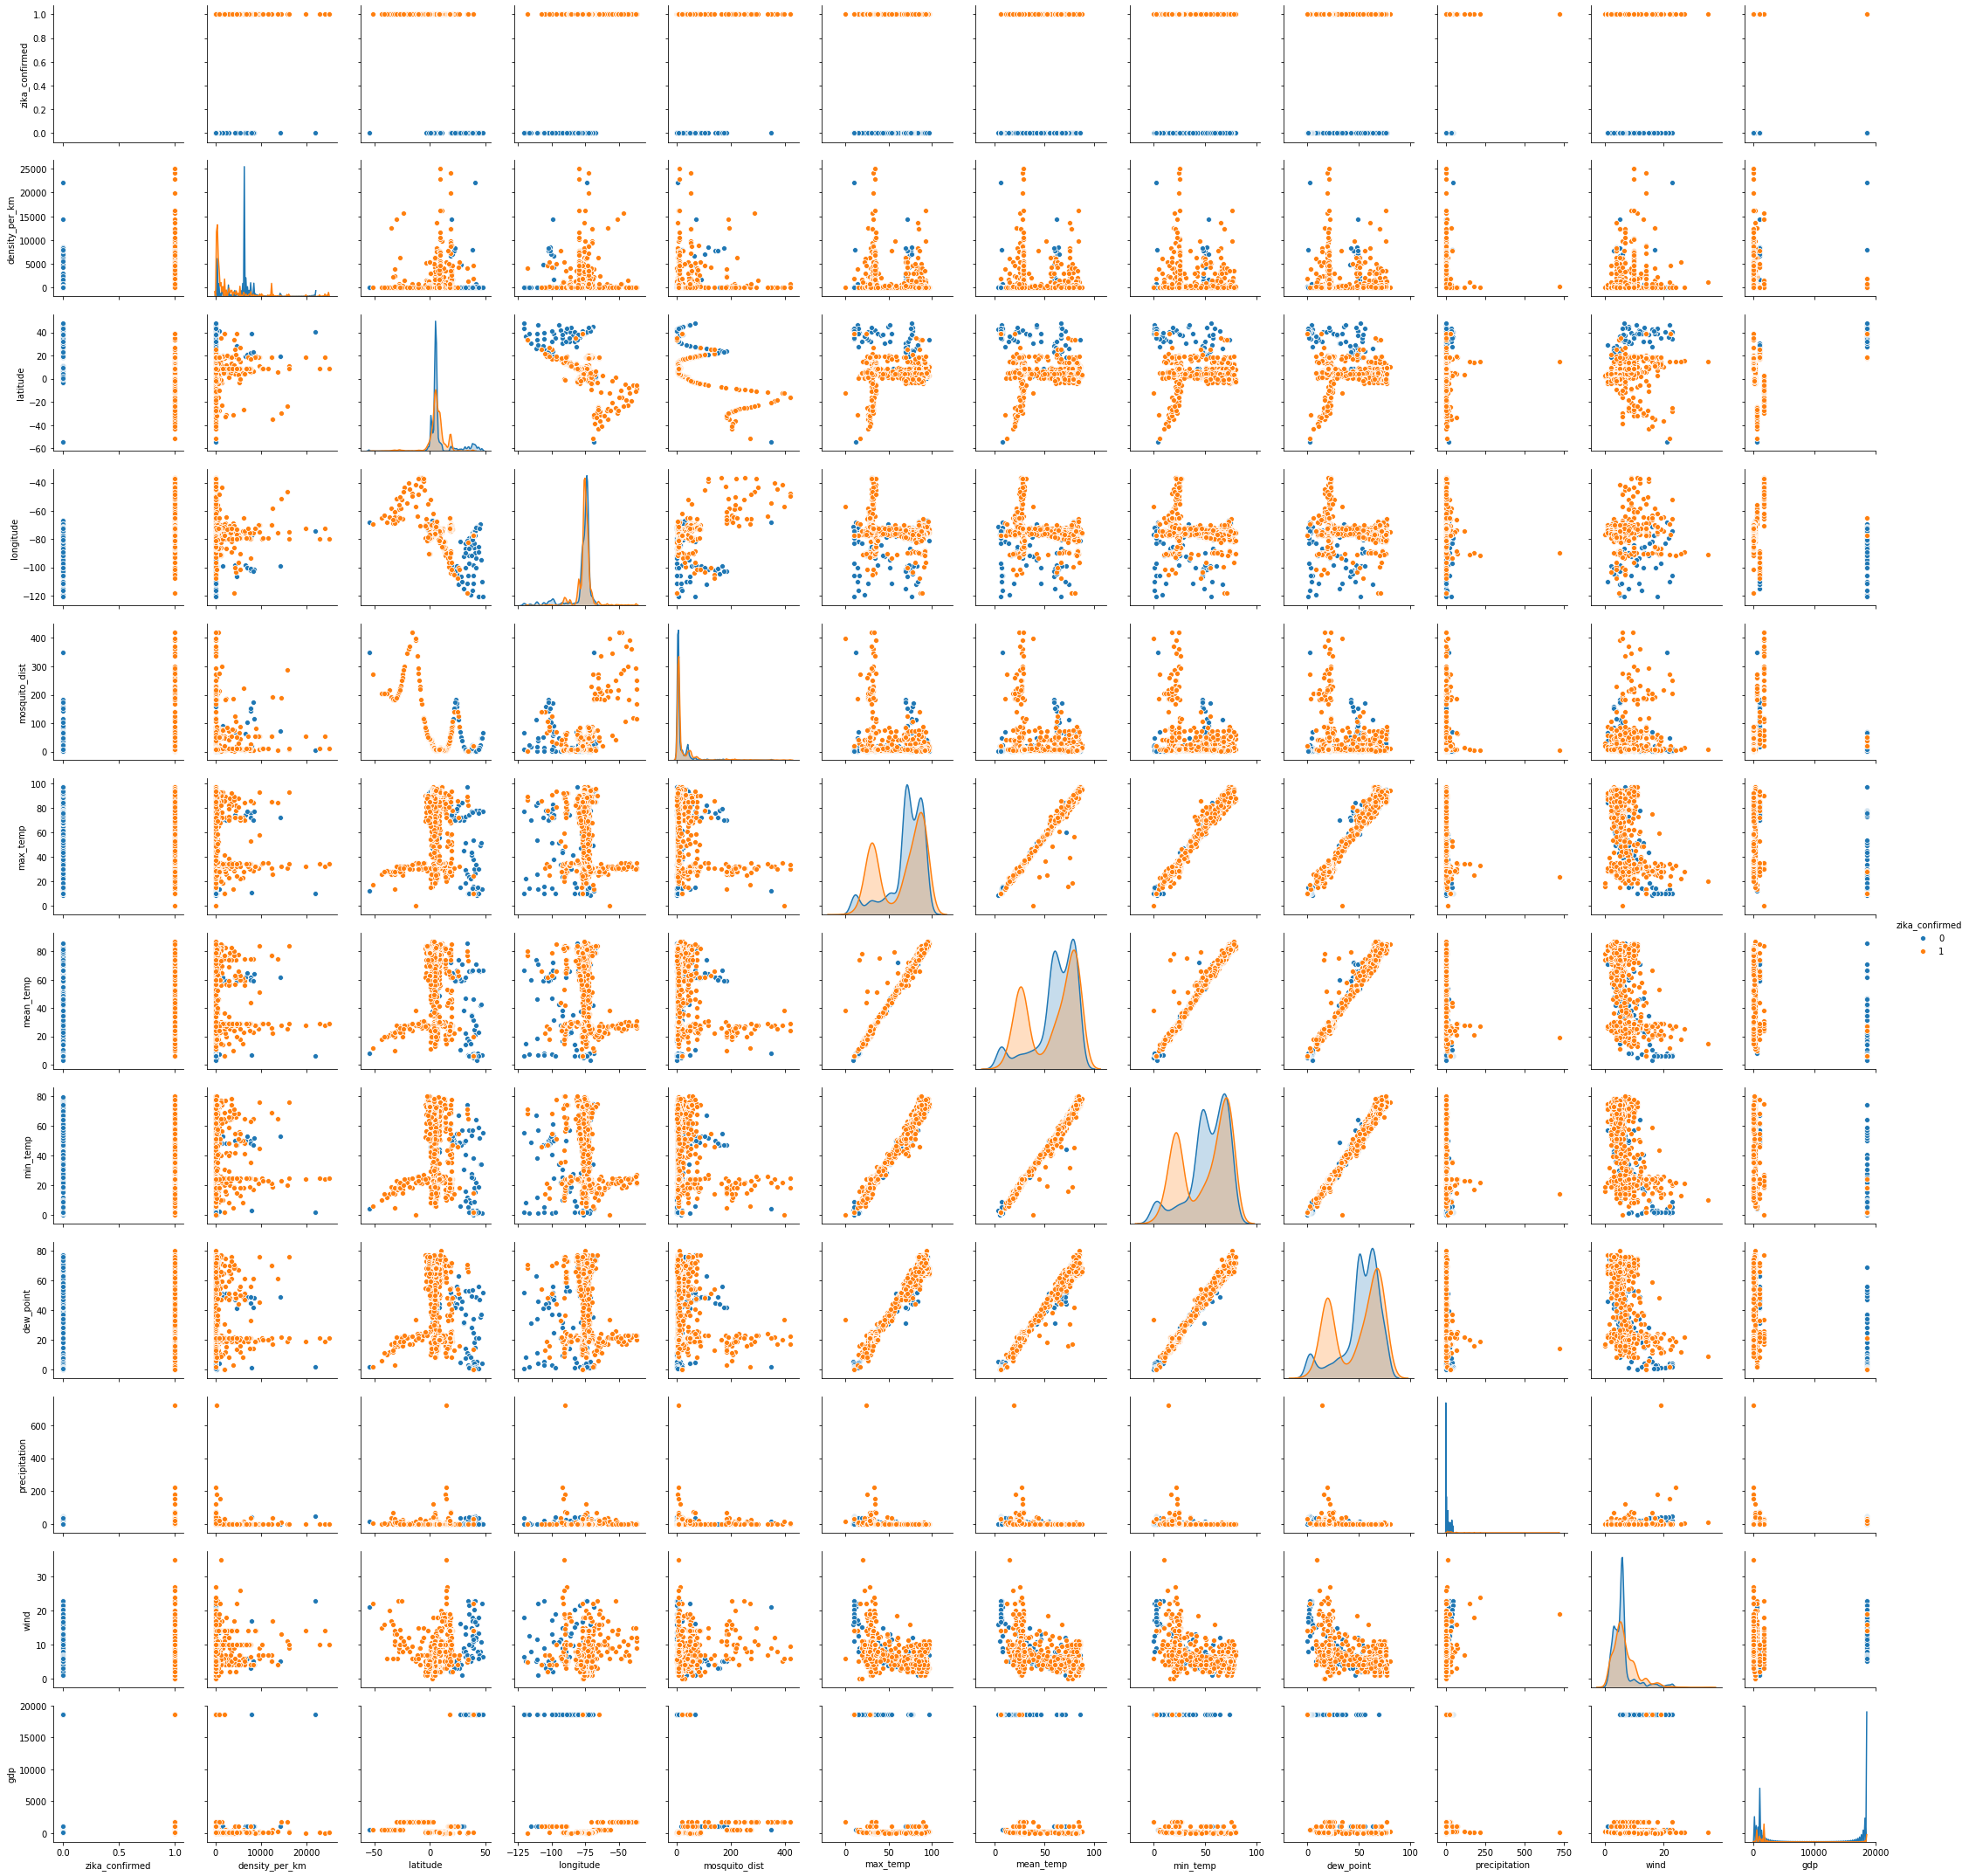

In [56]:
sns.pairplot(df, hue='zika_confirmed')

In [65]:
# make categorical columns numerical
X = df.copy()
from sklearn import preprocessing
lb_make = preprocessing.LabelEncoder()
X["location"] = lb_make.fit_transform(X["location"])
X["date"] = lb_make.fit_transform(X["date"])
X["location_type"] = lb_make.fit_transform(X["location_type"])

In [67]:
y = df['zika_confirmed']

In [68]:
X = X.drop(['zika_confirmed'],axis=1) 

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [70]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [71]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [72]:
predictions = dtree.predict(X_test)

In [ ]:
# metrics

In [73]:
from sklearn.metrics import classification_report,confusion_matrix

In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79        70
           1       0.95      0.93      0.94       242

    accuracy                           0.90       312
   macro avg       0.85      0.87      0.86       312
weighted avg       0.90      0.90      0.90       312



In [75]:
print(confusion_matrix(y_test,predictions))

[[ 57  13]
 [ 18 224]]


In [84]:
print('Score:', dtree.score(X_test, y_test))

Score: 0.9006410256410257


In [76]:
# random forest
from sklearn.ensemble import RandomForestClassifier

In [77]:
rfc = RandomForestClassifier(n_estimators=600)

In [78]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
predictions = rfc.predict(X_test)

In [80]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83        70
           1       0.95      0.95      0.95       242

    accuracy                           0.93       312
   macro avg       0.90      0.89      0.89       312
weighted avg       0.93      0.93      0.93       312



In [81]:
print(confusion_matrix(y_test,predictions))

[[ 58  12]
 [ 11 231]]


In [83]:
print('Score:', rfc.score(X_test, y_test))


Score: 0.9262820512820513


In [100]:
# cross validation K-fold
from sklearn.model_selection import KFold
scores = []
model = RandomForestClassifier(n_estimators=100)  
cv = KFold(n_splits=10, random_state=42, shuffle=False)
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

In [101]:
print(np.mean(scores))

0.8299172870140611
